<a href="https://colab.research.google.com/github/Yuchen-PLB/STA-160-Practice-in-Data-Science/blob/main/Code_of_STA160_Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 160 Midterm Project


## 1.1 Load the dataset

In [56]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [57]:

#load data from google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [58]:
#drive.mount('/content/gdrive')
path = '/gdrive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv'
heart_disease = pd.read_csv(path)

## 1.2 Overview of the data structure and outline

In [59]:
print (heart_disease.head(10))
print( heart_disease.describe())
print(heart_disease.info())
print(heart_disease.columns)

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6                   0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7                   0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8                   1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9                   0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0         

From the out put above we can see that the dataset contains 253680 rows of data and 21 different columns , each rows are make up by the non-null

In [60]:
ratio = heart_disease['HeartDiseaseorAttack'].value_counts()[1] / len(heart_disease['HeartDiseaseorAttack'])
1-ratio

0.9058144118574583

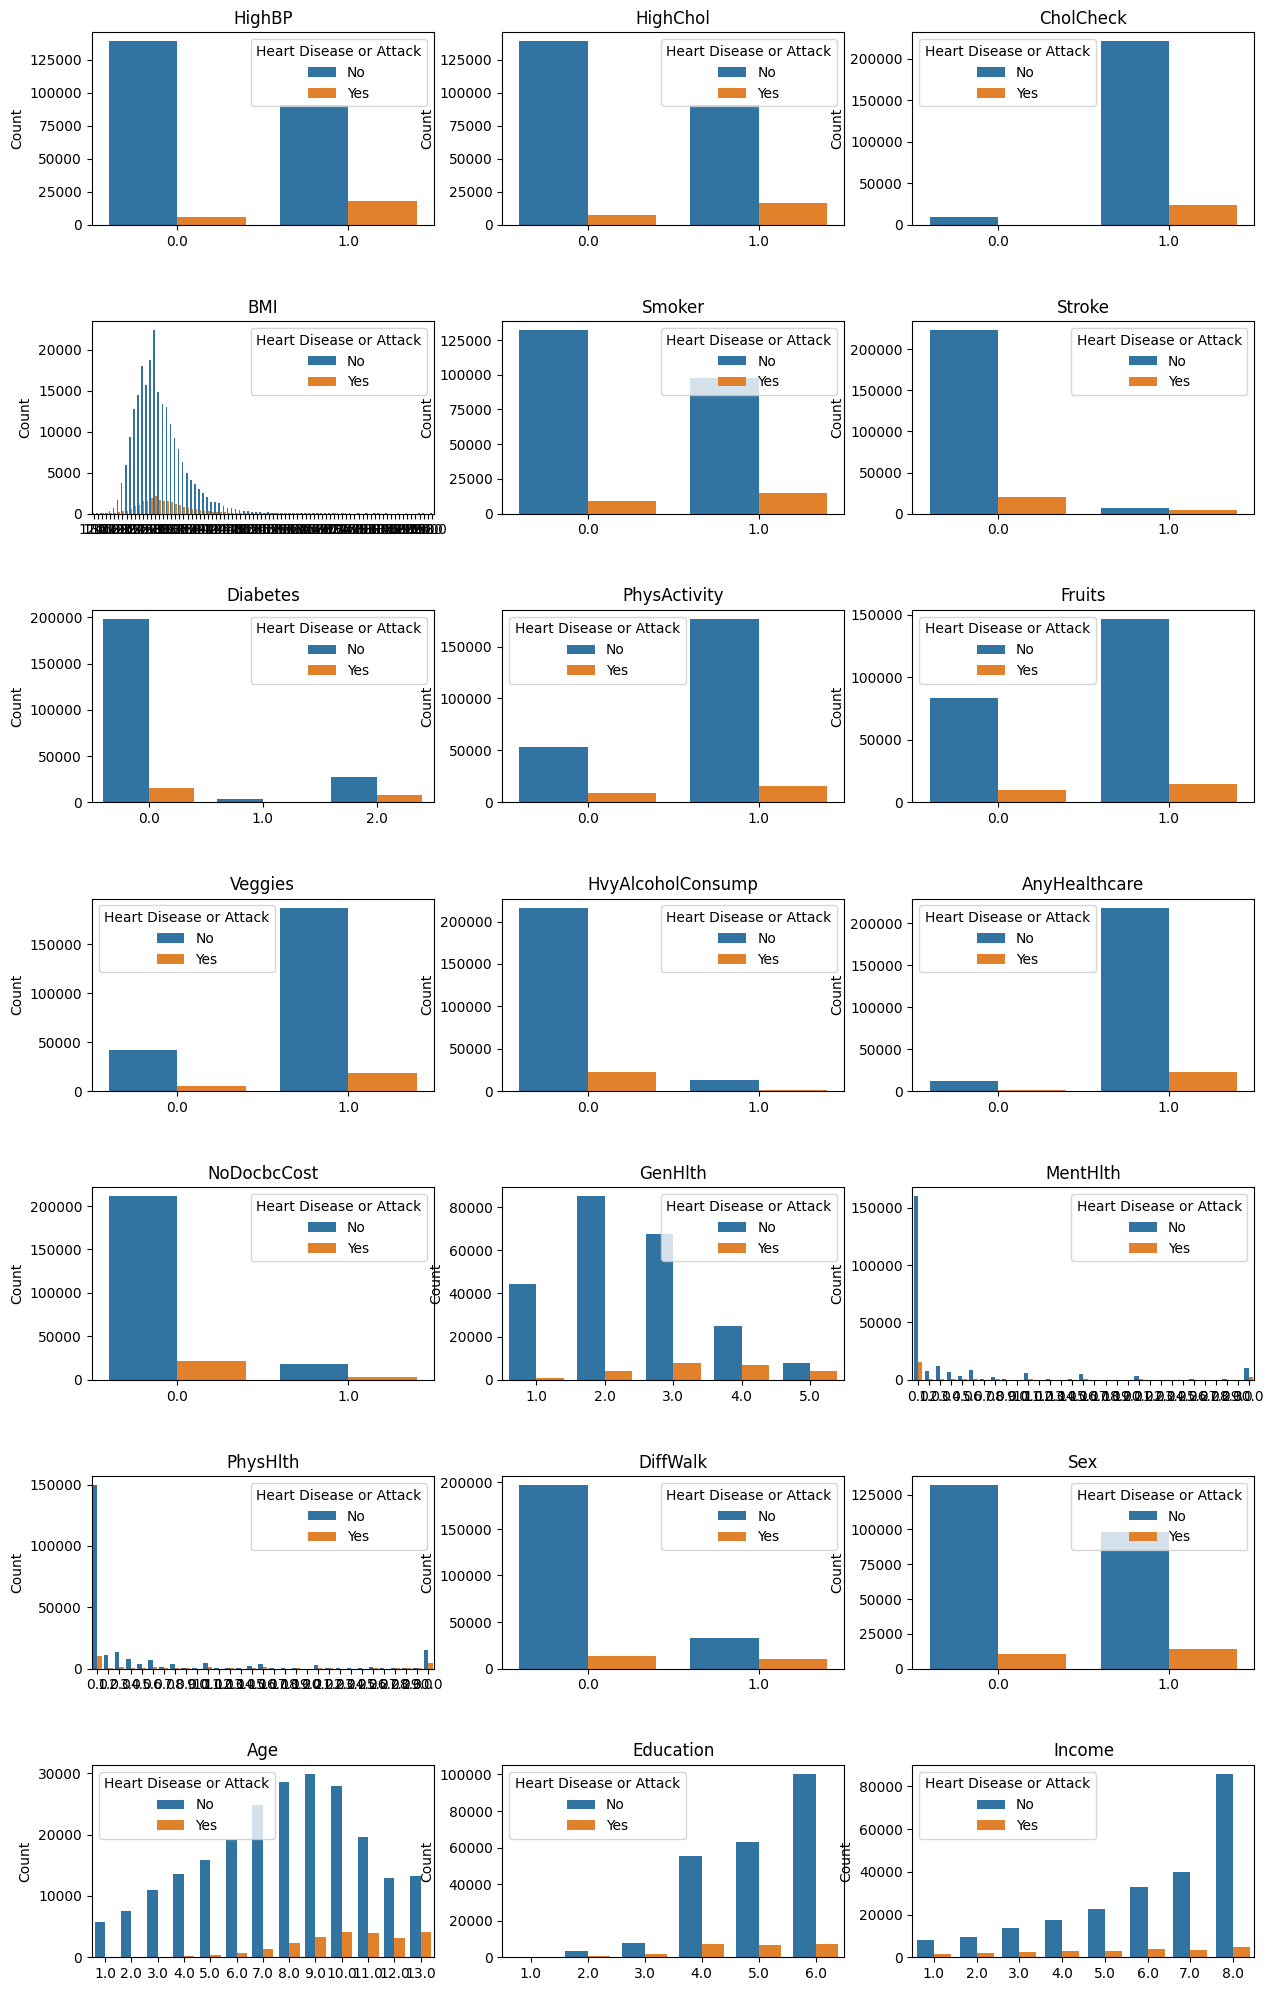

In [61]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load the heart_disease dataset into a pandas dataframe
df = heart_disease

# define the independent categorical variables
cat_vars = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 
            'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 
            'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# create a subplot of 7 rows and 3 columns
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(15, 25))

# loop through each independent variable and create a bar chart of the dependent variable's frequency distribution
for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(x=var, hue='HeartDiseaseorAttack', data=df, ax=ax)
    ax.set_title(var)
    ax.legend(title='Heart Disease or Attack', labels=['No', 'Yes'])
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)


# show the output figure
plt.show()



In [62]:
y = heart_disease['HeartDiseaseorAttack']
X = heart_disease[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]


# Calculate entropy of target variable
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Rank features by information gain (high to low)
feature_ranks = np.argsort(information_gains)[::-1]
feature_names = X.columns[feature_ranks]

# Print results
for rank, feature_name in enumerate(feature_names):
    print(f"{rank+1}. {feature_name}: {information_gains[feature_ranks[rank]]:.4f}")

1. GenHlth: 0.0464
2. Age: 0.0410
3. HighBP: 0.0319
4. DiffWalk: 0.0261
5. HighChol: 0.0235
6. PhysHlth: 0.0207
7. Diabetes: 0.0188
8. Stroke: 0.0188
9. Income: 0.0146
10. Smoker: 0.0094
11. Education: 0.0070
12. Sex: 0.0053
13. PhysActivity: 0.0051
14. BMI: 0.0036
15. MentHlth: 0.0033
16. CholCheck: 0.0019
17. Veggies: 0.0011
18. HvyAlcoholConsump: 0.0007
19. NoDocbcCost: 0.0006
20. Fruits: 0.0003
21. AnyHealthcare: 0.0003


\begin{equation}
I(X; Y) = \sum_{y \in Y} \sum_{x \in X} p(x, y) \log \frac{p(x, y)}{p(x) p(y)}
\end{equation}

### Dimionation reduction to creat the 2x2 dim contingency table

In [63]:
data_crosstab = pd.crosstab(heart_disease['HighBP'],
                            heart_disease['HeartDiseaseorAttack'], 
                            margins = False)
print(data_crosstab)

HeartDiseaseorAttack     0.0    1.0
HighBP                             
0.0                   138886   5965
1.0                    90901  17928


In [64]:
data_crosstab = pd.crosstab([heart_disease.HighBP, heart_disease.HighChol], 
                             heart_disease.HeartDiseaseorAttack, margins = False)
print(data_crosstab)

HeartDiseaseorAttack    0.0    1.0
HighBP HighChol                   
0.0    0.0            99044   2876
       1.0            39842   3089
1.0    0.0            39905   4264
       1.0            50996  13664


In [65]:
data_crosstab = pd.crosstab([heart_disease.HighBP, heart_disease.HighChol,heart_disease.Age], 
                             heart_disease.HeartDiseaseorAttack, margins = False)
print(data_crosstab)

HeartDiseaseorAttack    0.0   1.0
HighBP HighChol Age              
0.0    0.0      1.0    4809    21
                2.0    5981    26
                3.0    8171    56
                4.0    9287    62
                5.0    9732    87
                6.0   10281   120
                7.0   11466   196
                8.0   11120   240
                9.0    9734   353
                10.0   7501   415
                11.0   4588   365
                12.0   2965   339
                13.0   3409   596
       1.0      1.0     377     1
                2.0     706     4
                3.0    1248    12
                4.0    1882    23
                5.0    2551    46
                6.0    3580   103
                7.0    4951   242
                8.0    5872   351
                9.0    6149   490
                10.0   5487   539
                11.0   3518   485
                12.0   1890   354
                13.0   1631   439
1.0    0.0      1.0     364     4
              

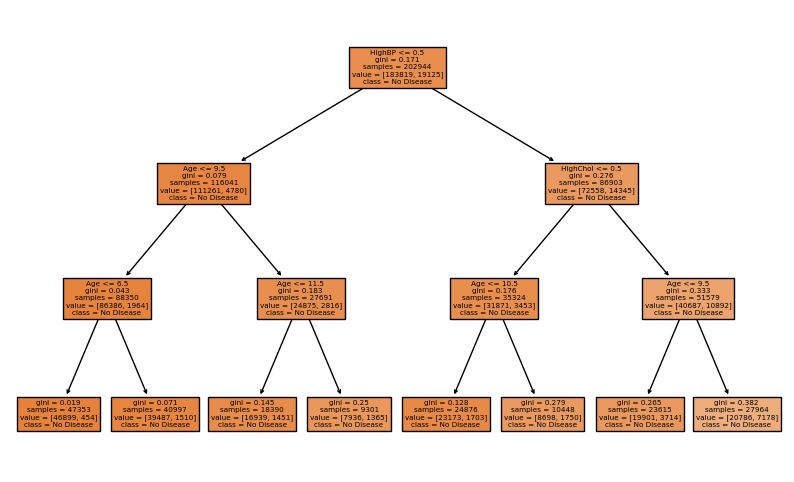

Accuracy: 0.9060233364869127


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the feature columns and target column
features = ['HighBP', 'HighChol', 'Age']
target = 'HeartDiseaseorAttack'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_disease[features], 
                                                    heart_disease[target], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize the decision tree classifier with a maximum depth of 3
clf = DecisionTreeClassifier(max_depth=3)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=features, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

# Use the trained classifier to make predictions on the testing set
y_pred = clf.predict(X_test)

# Print the accuracy score of the classifier
print('Accuracy:', accuracy_score(y_test, y_pred))

In this program, we first load the 'heart_disease' dataset using pandas and define the feature columns ('HighBP', 'HighChol', and 'Age') and the target column ('HeartDiseaseorAttack'). We then split the data into training and testing sets using the train_test_split function from scikit-learn.

Next, we initialize a decision tree classifier with a maximum depth of 3 and train it on the training set using the fit method. Finally, we plot the resulting decision tree using the plot_tree function from scikit-learn, which takes as input the trained classifier (clf), the feature names (features), the class names ('No Disease' and 'Disease'), and the filled argument, which fills the tree nodes with colors according to the class distribution. We also set the figsize argument to (10, 6) to make the plot larger.

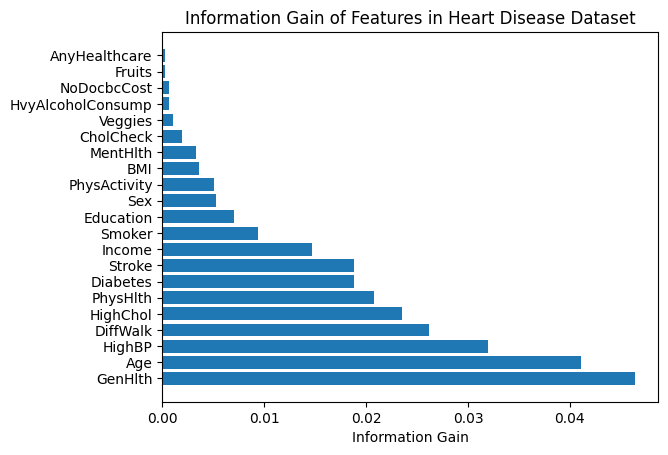

In [67]:
y = heart_disease['HeartDiseaseorAttack']
X = heart_disease[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Rank features by information gain (high to low)
feature_ranks = np.argsort(information_gains)[::-1]
feature_names = X.columns[feature_ranks]
information_gains_sorted = [information_gains[i] for i in feature_ranks]

# Plot horizontal bar chart of information gain for each feature
plt.barh(feature_names, information_gains_sorted)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Information Gain")
plt.show()

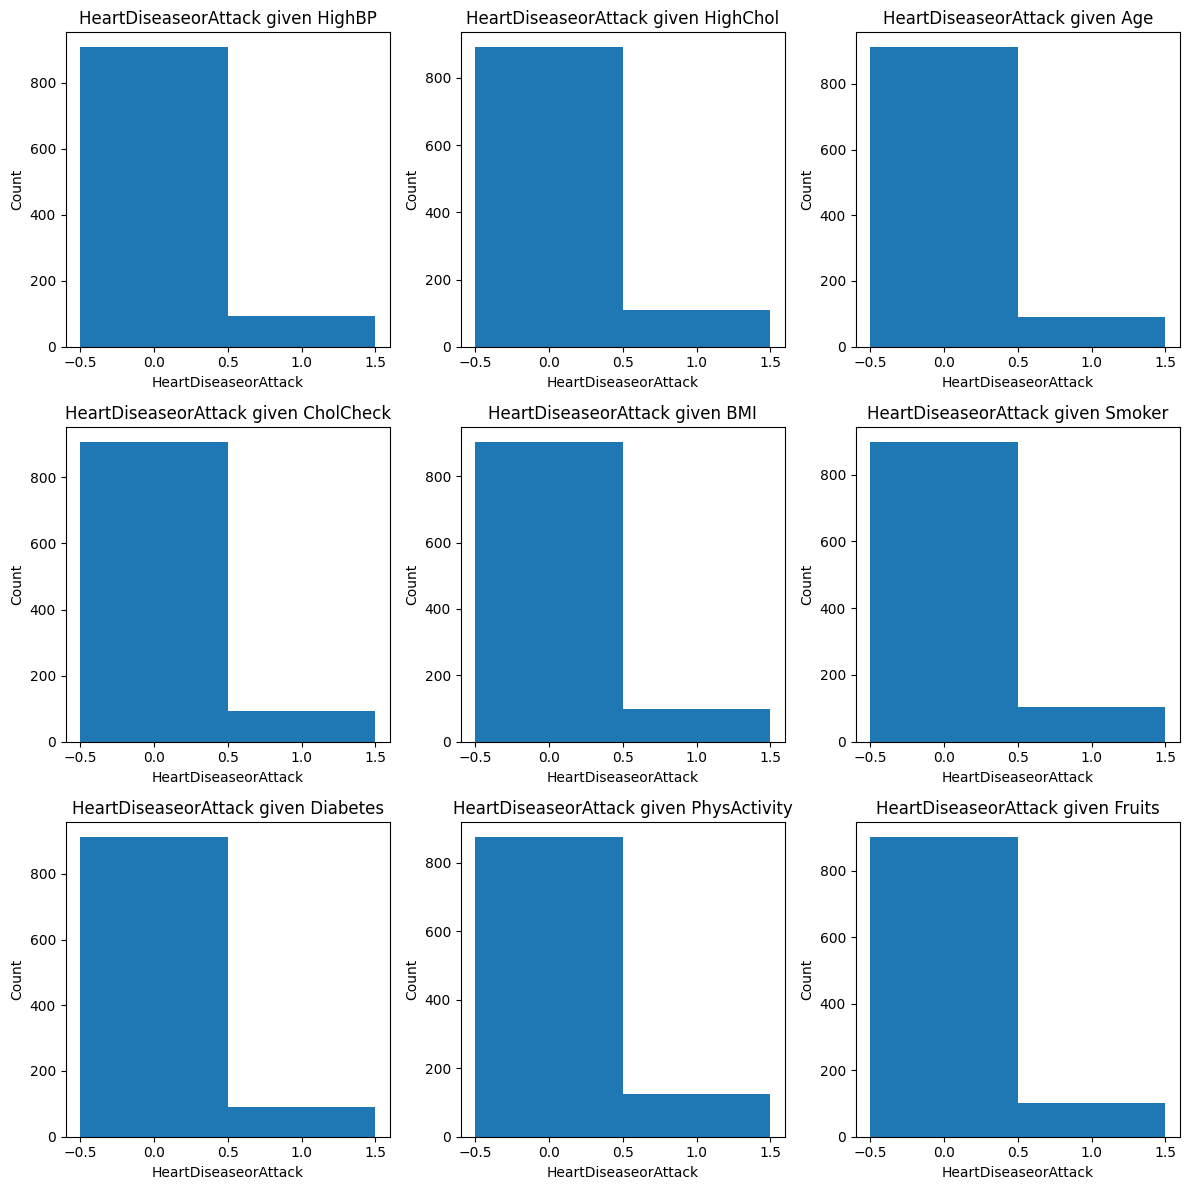

In [68]:
def monte_carlo_estimate(feature, n_samples=1000):
    y_given_feature = []
    unique_values = heart_disease[feature].unique()
    probabilities = heart_disease[feature].value_counts(normalize=True)
    for _ in range(n_samples):
        value = np.random.choice(unique_values, p=probabilities)
        y_given_value = heart_disease.loc[heart_disease[feature] == value, 'HeartDiseaseorAttack']
        y_given_feature.append(np.random.choice(y_given_value))
    return y_given_feature

# Plot histograms of target variable given each feature using Monte Carlo estimates
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for feature, ax in zip(['HighBP', 'HighChol', 'Age', 'CholCheck', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits'], axs.flatten()):
    y_given_feature = monte_carlo_estimate(feature)
    ax.hist(y_given_feature, bins=[0, 1, 2], align='left')
    ax.set_title(f"HeartDiseaseorAttack given {feature}")
    ax.set_xlabel("HeartDiseaseorAttack")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

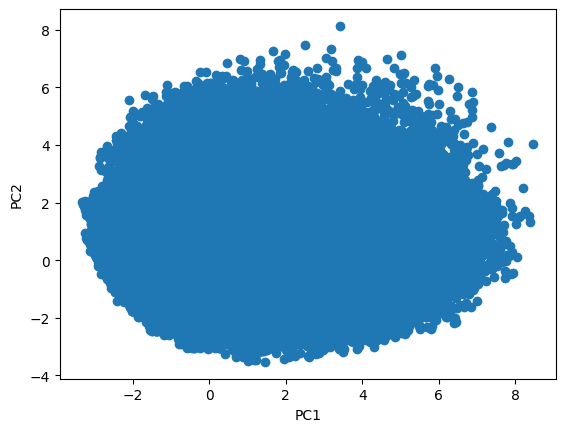

Explained variance of top 2 components: [0.16887932 0.08353432]


In [69]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Drop the target column (we don't want to include it in the PCA)
target_col = 'HeartDiseaseorAttack'
X = heart_disease.drop(target_col, axis=1)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
pca.fit(X_std)

# Transform the data into the new feature space
X_pca = pca.transform(X_std)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Fit the PCA model to the data
pca.fit(X_std)

# Print the explained variance of the top 2 components
print('Explained variance of top 2 components:', pca.explained_variance_ratio_[:2])


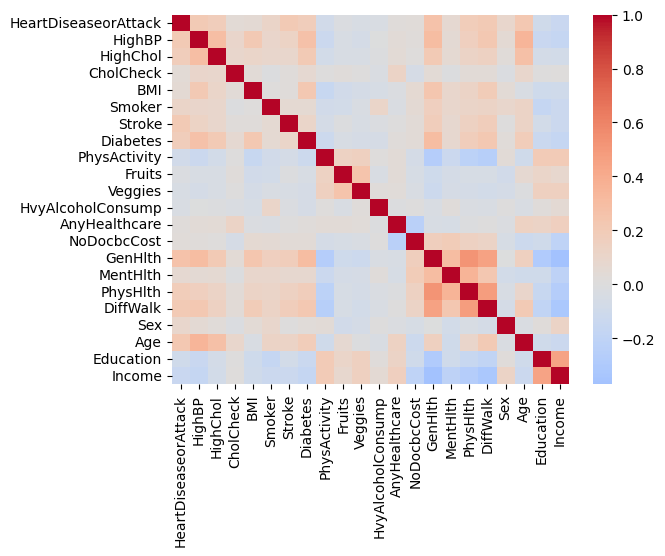

GenHlth              0.258383
Age                  0.221618
DiffWalk             0.212709
HighBP               0.209361
Stroke               0.203002
PhysHlth             0.181698
HighChol             0.180765
Diabetes             0.180272
Income               0.141011
Smoker               0.114441
Education            0.099600
PhysActivity         0.087299
Sex                  0.086096
MentHlth             0.064621
BMI                  0.052904
CholCheck            0.044206
Veggies              0.039167
NoDocbcCost          0.031000
HvyAlcoholConsump    0.028991
Fruits               0.019790
AnyHealthcare        0.018734
Name: HeartDiseaseorAttack, dtype: float64


In [70]:
import seaborn as sns
sns.heatmap(heart_disease.corr(), cmap='coolwarm', center=0)

# Show the plot
plt.show()

# Calculate the absolute correlation between 'HeartDiseaseorAttack' and the other columns
corr = heart_disease.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack').abs().sort_values(ascending=False)

# Print the correlation values in descending order
print(corr)

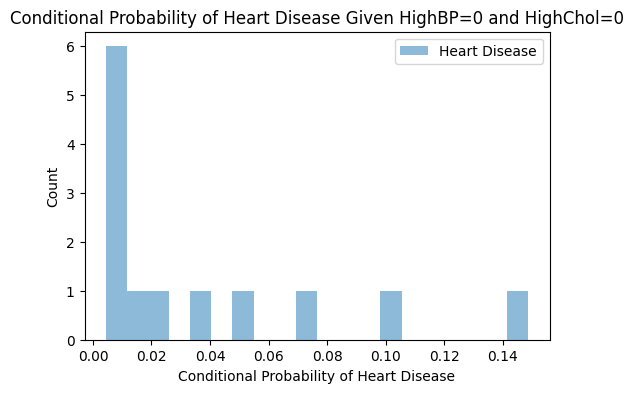

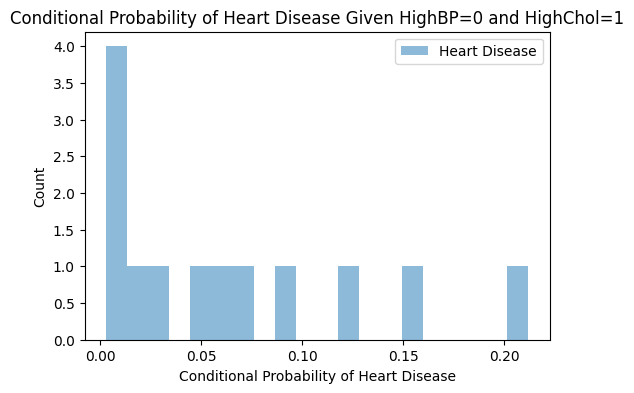

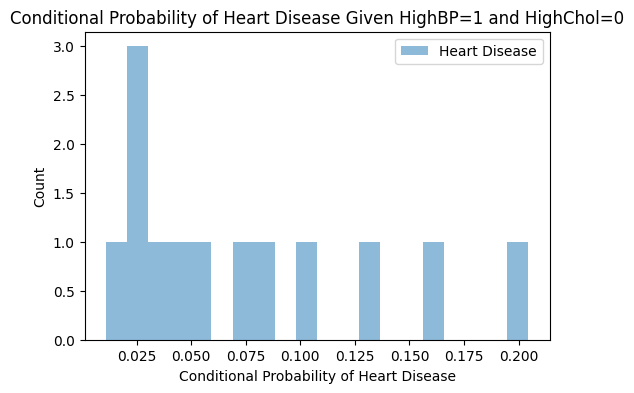

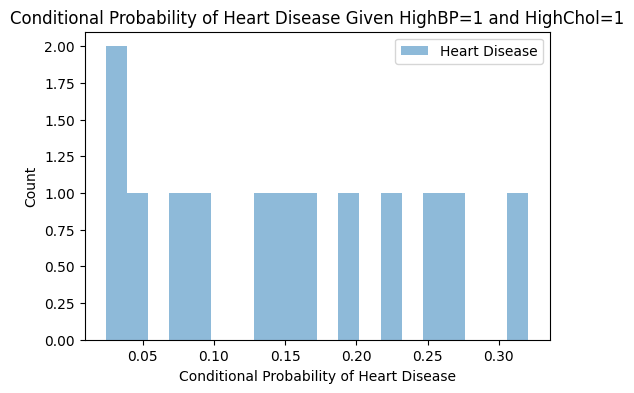

In [71]:
# Bin the data by age
age_bins = heart_disease['Age']

# Calculate the conditional probability of HeartDiseaseorAttack for each combination of HighBP, HighChol, and Age
heart_disease_cond_prob = heart_disease.groupby(['HighBP', 'HighChol', 'Age'])['HeartDiseaseorAttack'].mean().reset_index()

# Plot the conditional probability as a histogram for each combination of HighBP and HighChol
for high_bp in [0, 1]:
    for high_chol in [0, 1]:
        plt.figure(figsize=(6, 4))
        plt.hist(heart_disease_cond_prob[(heart_disease_cond_prob['HighBP'] == high_bp) & (heart_disease_cond_prob['HighChol'] == high_chol)]['HeartDiseaseorAttack'], bins=20, alpha=0.5, label='Heart Disease')
        plt.xlabel('Conditional Probability of Heart Disease')
        plt.ylabel('Count')
        plt.title('Conditional Probability of Heart Disease Given HighBP={} and HighChol={}'.format(high_bp, high_chol))
        plt.legend()
        plt.show()

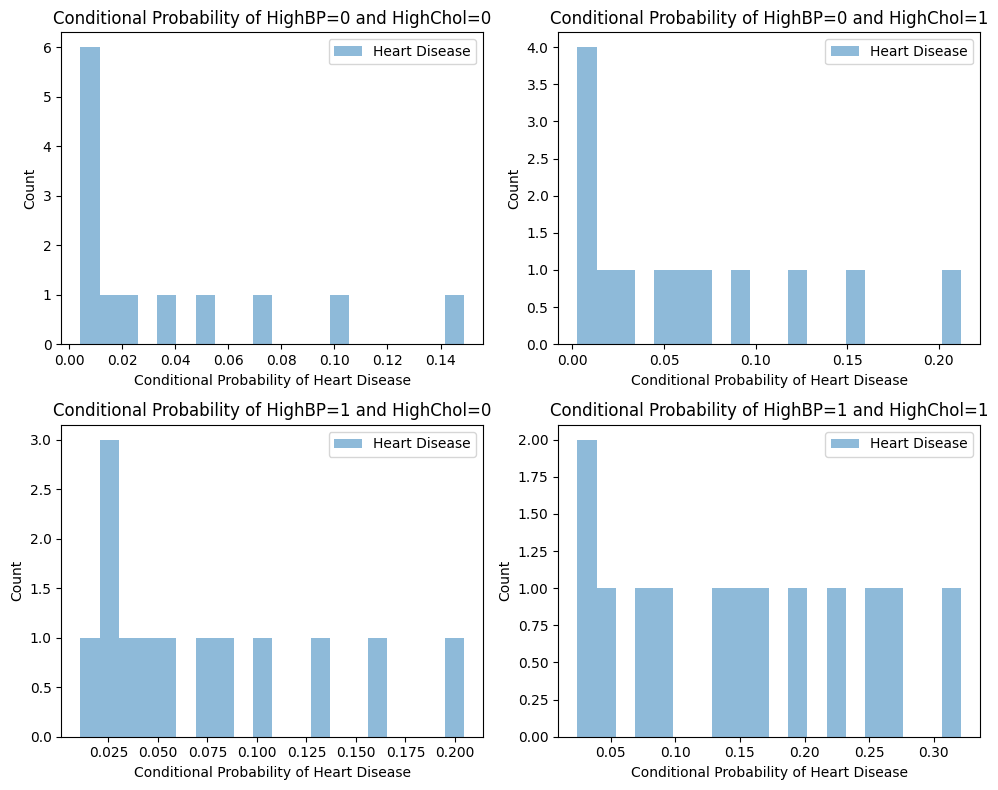

In [112]:
# Bin the data by age
age_bins = heart_disease['Age']

# Calculate the conditional probability of HeartDiseaseorAttack for each combination of HighBP, HighChol, and Age
heart_disease_cond_prob = heart_disease.groupby(['HighBP', 'HighChol', 'Age'])['HeartDiseaseorAttack'].mean().reset_index()

# Create a figure with subplots for each combination of HighBP and HighChol
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the conditional probability as a histogram for each combination of HighBP and HighChol
for i, high_bp in enumerate([0, 1]):
    for j, high_chol in enumerate([0, 1]):
        ax = axs[i][j]
        data = heart_disease_cond_prob[(heart_disease_cond_prob['HighBP'] == high_bp) & (heart_disease_cond_prob['HighChol'] == high_chol)]
        ax.hist(data['HeartDiseaseorAttack'], bins=20, alpha=0.5, label='Heart Disease')
        ax.set_xlabel('Conditional Probability of Heart Disease')
        ax.set_ylabel('Count')
        ax.set_title('Conditional Probability of HighBP={} and HighChol={}'.format(high_bp, high_chol))
        ax.legend()

plt.tight_layout()
plt.show()


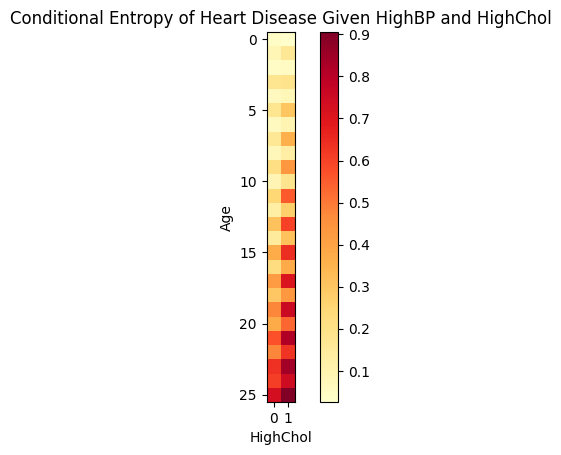

In [73]:
from scipy.stats import entropy

# Calculate the conditional entropy of HeartDiseaseorAttack for each combination of HighBP, HighChol, and Age
heart_disease_cond_entropy = heart_disease.groupby(['HighBP', 'HighChol', 'Age'])['HeartDiseaseorAttack'].apply(lambda x: entropy(np.histogram(x, bins=[0, 0.5, 1])[0], base=2)).reset_index()
heart_disease_cond_entropy = heart_disease_cond_entropy.rename(columns={'HeartDiseaseorAttack': 'Entropy'})
age = heart_disease.Age
# Plot the conditional entropy as a heatmap for each combination of HighBP and HighChol
heatmap_data = heart_disease_cond_entropy.pivot(index=['Age', 'HighBP'], columns='HighChol', values='Entropy')
plt.imshow(heatmap_data, cmap='YlOrRd', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len([0, 1])), [0, 1])
#plt.yticks(age)
plt.xlabel('HighChol')
plt.ylabel('Age')
plt.title('Conditional Entropy of Heart Disease Given HighBP and HighChol')
plt.show()


\begin{equation}
H(Y|X) = -\sum_{x \in X} \sum_{y \in Y} p(x,y) \log\frac{p(x)}{p(x,y)}
\end{equation}

where $p(x,y)$ is the joint probability distribution of X and Y, and $p(x)$ is the marginal probability distribution of X. This formula measures the amount of uncertainty in Y given X.

## 

In [74]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Define feature columns and target column
feature_cols = ['HighBP', 'HighChol', 'Age']
target_col = 'HeartDiseaseorAttack'

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(heart_disease[feature_cols], heart_disease[target_col], test_size=0.2, random_state=42)# Split the data into training and testing sets

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(len(feature_cols),)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=1, batch_size=32, validation_data=(test_data, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)


1586/1586 [==============================] - 2s 941us/step - loss: 0.2664 - accuracy: 0.9060
Test accuracy: 0.9060233235359192


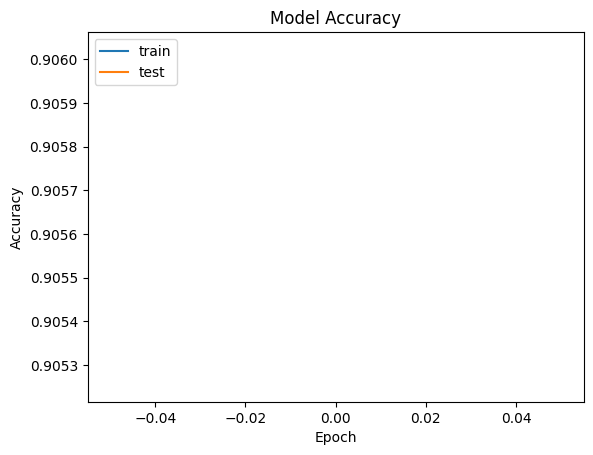

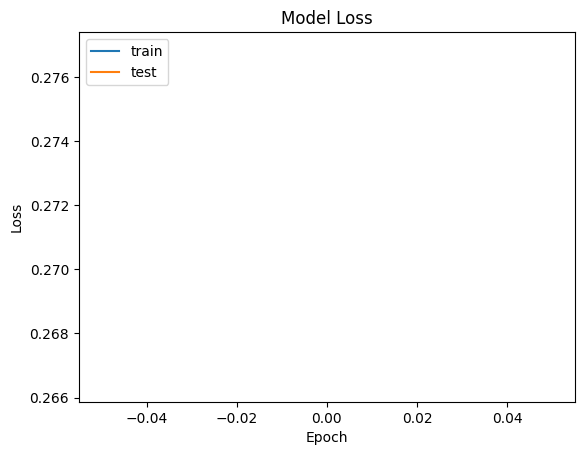

In [75]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [76]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define feature columns and target column

# Prepare the data
X = heart_disease[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 
        'Education', 'Income']].values
y = heart_disease['HeartDiseaseorAttack'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


1586/1586 [==============================] - 2s 996us/step - loss: 0.2461 - accuracy: 0.9060
Test accuracy: 0.9060036540031433


In this program, we first load the 'heart_disease' dataset using pandas and define the feature columns ('HighBP', 'HighChol', and 'Age') and the target column ('HeartDiseaseorAttack'). We then split the data into training and testing sets using the train_test_split function from scikit-learn.

Next, we define the DNN using TensorFlow's Sequential API. The model has three layers: the first two are fully connected (Dense) layers with 64 and 32 neurons, respectively, and ReLU activation functions; the third layer is a fully connected layer with one neuron and a sigmoid activation function, which outputs a probability of the positive class (disease).

We compile the model by specifying the optimizer (adam), loss function (binary_crossentropy), and metric to optimize (accuracy).

We train the model on the training data using the fit method, with 50 epochs and a batch size of 32. We also pass in the testing data to evaluate the model's performance on unseen data.

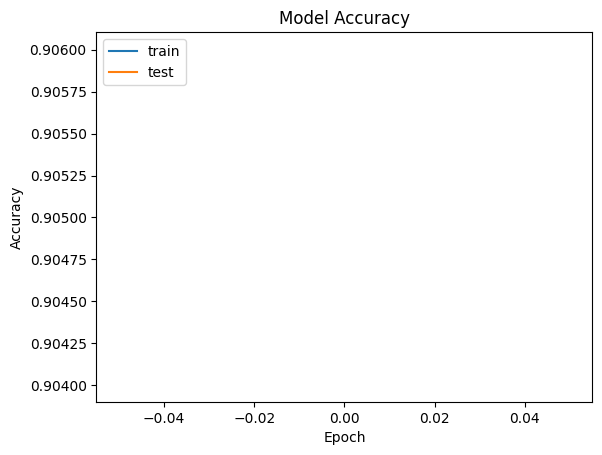

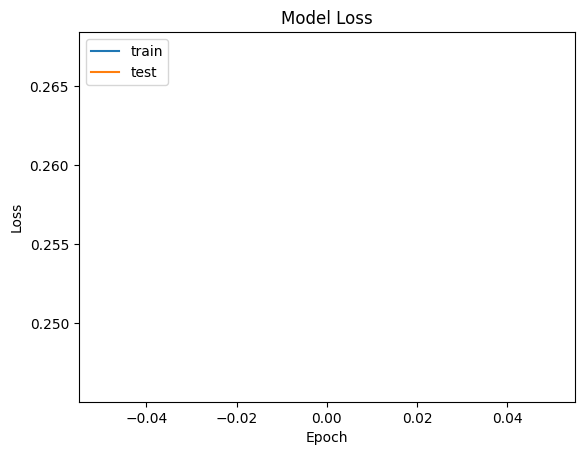

In [77]:




# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [78]:

# Create a dataframe for HighBP
high_bp_df = heart_disease[heart_disease['HighBP'] == 1]

# Create a dataframe for normal BP
normal_bp_df = heart_disease[heart_disease['HighBP'] == 0]

# Create a dataframe for HighChol
high_chol_df = heart_disease[heart_disease['HighChol'] == 1]

# Create a dataframe for normal Chol
normal_chol_df = heart_disease[heart_disease['HighChol'] == 0]


In [79]:
heart_disease['HD+Stroke'] = heart_disease['HeartDiseaseorAttack'].astype(int).astype(str) + ',' + heart_disease['Stroke'].astype(int).astype(str)
heart_disease['GenHlth+Age'] = heart_disease['GenHlth'].astype(int).astype(str) + ',' + heart_disease['Age'].astype(int).astype(str)
# display the new variable
print(heart_disease['HD+Stroke'])

0         0,0
1         0,0
2         0,0
3         0,0
4         0,0
         ... 
253675    0,0
253676    0,0
253677    0,0
253678    0,0
253679    1,0
Name: HD+Stroke, Length: 253680, dtype: object


In [80]:
import itertools

# Define the list of column names to consider
bin_cols = ['HighBP', 'HighChol', 'CholCheck' , 'Diabetes','GenHlth','Age' ,'DiffWalk']

# Get all possible combinations of length 2
combos = itertools.combinations(bin_cols, 2)

# Loop over each combination
for combo in combos:
    # Get the column names for this combination
    col1, col2 = combo
    
    # Create a new column with fused binary variables
    heart_disease[f"{col1}+{col2}"] = heart_disease.apply(lambda x: (x[col1], x[col2]), axis=1)


In [81]:
print(heart_disease.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'HD+Stroke', 'GenHlth+Age', 'HighBP+HighChol', 'HighBP+CholCheck',
       'HighBP+Diabetes', 'HighBP+GenHlth', 'HighBP+Age', 'HighBP+DiffWalk',
       'HighChol+CholCheck', 'HighChol+Diabetes', 'HighChol+GenHlth',
       'HighChol+Age', 'HighChol+DiffWalk', 'CholCheck+Diabetes',
       'CholCheck+GenHlth', 'CholCheck+Age', 'CholCheck+DiffWalk',
       'Diabetes+GenHlth', 'Diabetes+Age', 'Diabetes+DiffWalk',
       'GenHlth+DiffWalk', 'Age+DiffWalk'],
      dtype='object')


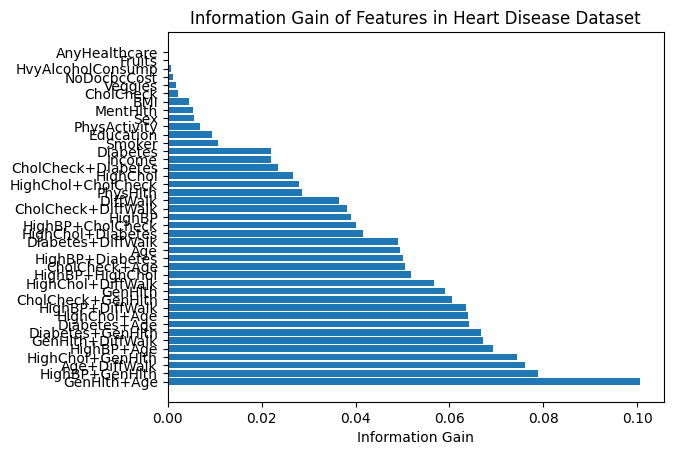

In [82]:

y = heart_disease['HD+Stroke']
X = heart_disease[['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
        'GenHlth+Age', 'HighBP+HighChol', 'HighBP+CholCheck',
       'HighBP+Diabetes', 'HighBP+GenHlth', 'HighBP+Age', 'HighBP+DiffWalk',
       'HighChol+CholCheck', 'HighChol+Diabetes', 'HighChol+GenHlth',
       'HighChol+Age', 'HighChol+DiffWalk', 'CholCheck+Diabetes',
       'CholCheck+GenHlth', 'CholCheck+Age', 'CholCheck+DiffWalk',
       'Diabetes+GenHlth', 'Diabetes+Age', 'Diabetes+DiffWalk',
       'GenHlth+DiffWalk', 'Age+DiffWalk']]
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Rank features by information gain (high to low)
feature_ranks = np.argsort(information_gains)[::-1]
feature_names = X.columns[feature_ranks]
information_gains_sorted = [information_gains[i] for i in feature_ranks]

# Plot horizontal bar chart of information gain for each feature
plt.barh(feature_names, information_gains_sorted)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Information Gain")
plt.show()

In [83]:
import itertools

# Define the list of column names to consider
bin_cols = ['HighBP', 'HighChol','GenHlth','Age']

# Get all possible combinations of length 2
combos = itertools.combinations(bin_cols, 3)

# Loop over each combination
for combo in combos:
    # Get the column names for this combination
    col1, col2, col3 = combo
    
    # Create a new column with fused binary variables
    heart_disease[f"{col1}+{col2}+{col3}"] = heart_disease.apply(lambda x: (x[col1], x[col2], x[col3]), axis=1)

In [84]:
print(heart_disease.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'HD+Stroke', 'GenHlth+Age', 'HighBP+HighChol', 'HighBP+CholCheck',
       'HighBP+Diabetes', 'HighBP+GenHlth', 'HighBP+Age', 'HighBP+DiffWalk',
       'HighChol+CholCheck', 'HighChol+Diabetes', 'HighChol+GenHlth',
       'HighChol+Age', 'HighChol+DiffWalk', 'CholCheck+Diabetes',
       'CholCheck+GenHlth', 'CholCheck+Age', 'CholCheck+DiffWalk',
       'Diabetes+GenHlth', 'Diabetes+Age', 'Diabetes+DiffWalk',
       'GenHlth+DiffWalk', 'Age+DiffWalk', 'HighBP+HighChol+GenHlth',
       'HighBP+HighChol+Age', 'HighBP+GenHlth+Age', 'HighChol+GenHlth+Age'],
      dtype='object')


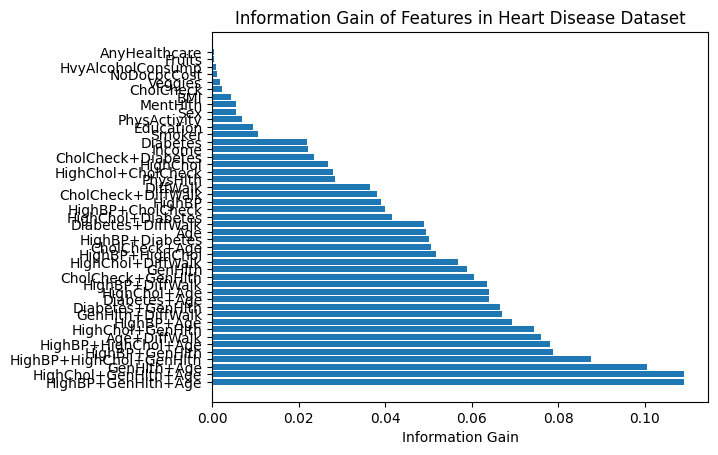

In [85]:
y = heart_disease['HD+Stroke']
X = heart_disease[['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker' , 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
        'GenHlth+Age', 'HighBP+HighChol', 'HighBP+CholCheck',
       'HighBP+Diabetes', 'HighBP+GenHlth', 'HighBP+Age', 'HighBP+DiffWalk',
       'HighChol+CholCheck', 'HighChol+Diabetes', 'HighChol+GenHlth',
       'HighChol+Age', 'HighChol+DiffWalk', 'CholCheck+Diabetes',
       'CholCheck+GenHlth', 'CholCheck+Age', 'CholCheck+DiffWalk',
       'Diabetes+GenHlth', 'Diabetes+Age', 'Diabetes+DiffWalk',
       'GenHlth+DiffWalk', 'Age+DiffWalk', 'HighBP+HighChol+GenHlth',
       'HighBP+HighChol+Age', 'HighBP+GenHlth+Age', 'HighChol+GenHlth+Age']]
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Rank features by information gain (high to low)
feature_ranks = np.argsort(information_gains)[::-1]
feature_names = X.columns[feature_ranks]
information_gains_sorted = [information_gains[i] for i in feature_ranks]

# Plot horizontal bar chart of information gain for each feature
plt.barh(feature_names, information_gains_sorted)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Information Gain")
plt.show()

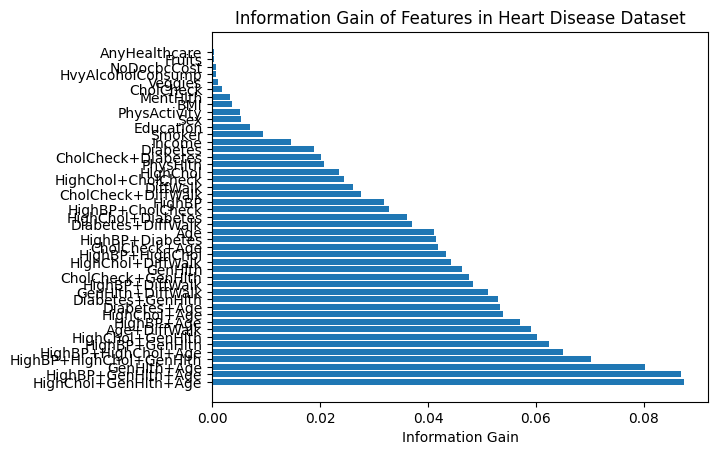

In [86]:
y = heart_disease['HeartDiseaseorAttack']
X = heart_disease[['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker' , 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
        'GenHlth+Age', 'HighBP+HighChol', 'HighBP+CholCheck',
       'HighBP+Diabetes', 'HighBP+GenHlth', 'HighBP+Age', 'HighBP+DiffWalk',
       'HighChol+CholCheck', 'HighChol+Diabetes', 'HighChol+GenHlth',
       'HighChol+Age', 'HighChol+DiffWalk', 'CholCheck+Diabetes',
       'CholCheck+GenHlth', 'CholCheck+Age', 'CholCheck+DiffWalk',
       'Diabetes+GenHlth', 'Diabetes+Age', 'Diabetes+DiffWalk',
       'GenHlth+DiffWalk', 'Age+DiffWalk', 'HighBP+HighChol+GenHlth',
       'HighBP+HighChol+Age', 'HighBP+GenHlth+Age', 'HighChol+GenHlth+Age']]
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Rank features by information gain (high to low)
feature_ranks = np.argsort(information_gains)[::-1]
feature_names = X.columns[feature_ranks]
information_gains_sorted = [information_gains[i] for i in feature_ranks]

# Plot horizontal bar chart of information gain for each feature
plt.barh(feature_names, information_gains_sorted)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Information Gain")
plt.show()

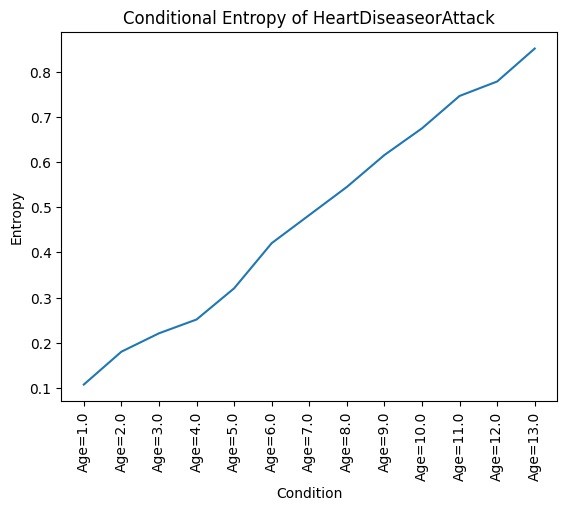

In [87]:



# Define the feature columns and the target column
features = ['Age']
target = 'HeartDiseaseorAttack'

# Compute the conditional entropy of the target column based on the feature columns
entropy = {}
for col in features:
    for val in set(high_bp_df[col]):
        subdata = high_bp_df[high_bp_df[col] == val]
        p = subdata[target].value_counts(normalize=True)
        entropy[(col, val)] = -np.sum(p * np.log2(p))

# Plot the conditional entropy as a line chart
x = np.arange(len(entropy))
y = list(entropy.values())
labels = ['{}={}'.format(*k) for k in entropy.keys()]
plt.plot(x, y)
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Condition')
plt.ylabel('Entropy')
plt.title('Conditional Entropy of HeartDiseaseorAttack')
plt.show()


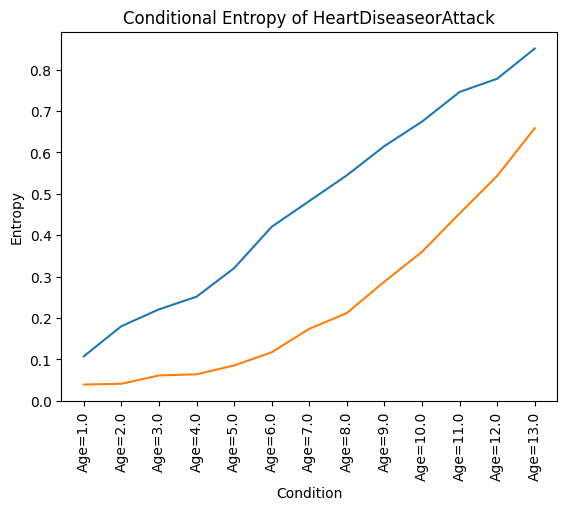

In [88]:

# Define the feature columns and the target column
features = ['Age']
target = 'HeartDiseaseorAttack'

# Compute the conditional entropy of the target column based on the feature columns
entropy = {}
for col in features:
    for val in set(normal_bp_df[col]):
        subdata = normal_bp_df[normal_bp_df[col] == val]
        p = subdata[target].value_counts(normalize=True)
        entropy[(col, val)] = -np.sum(p * np.log2(p))

# Plot the conditional entropy as a line chart
x = np.arange(len(entropy))
y2 = list(entropy.values())
labels = ['{}={}'.format(*k) for k in entropy.keys()]
plt.plot(x, y, y2)
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Condition')
plt.ylabel('Entropy')
plt.title('Conditional Entropy of HeartDiseaseorAttack')
plt.show()

In [89]:
#HD+Stroke

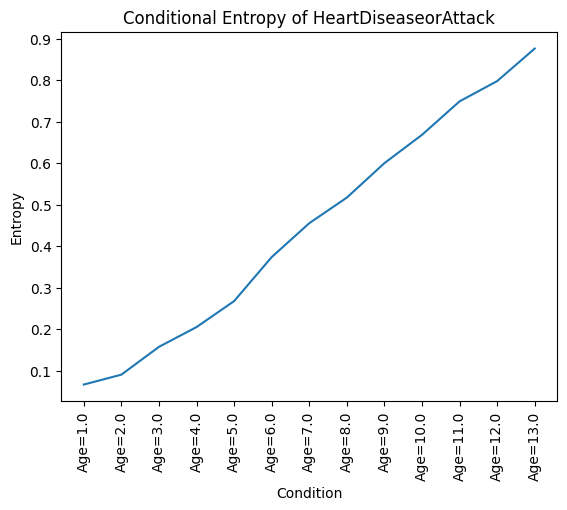

In [90]:
# Define the feature columns and the target column
features = ['Age']
target = 'HeartDiseaseorAttack'

# Compute the conditional entropy of the target column based on the feature columns
entropy = {}
for col in features:
    for val in set(high_chol_df[col]):
        subdata = high_chol_df[high_chol_df[col] == val]
        p = subdata[target].value_counts(normalize=True)
        entropy[(col, val)] = -np.sum(p * np.log2(p))

# Plot the conditional entropy as a line chart
x = np.arange(len(entropy))
y3 = list(entropy.values())
entropy = {}
for col in features:
    for val in set(normal_chol_df[col]):
        subdata = normal_chol_df[normal_chol_df[col] == val]
        p = subdata[target].value_counts(normalize=True)
        entropy[(col, val)] = -np.sum(p * np.log2(p))

# Plot the conditional entropy as a line chart
x = np.arange(len(entropy))
y4 = list(entropy.values())
plt.plot(x ,y3)
plt.xticks(x, labels, rotation='vertical')
plt.xlabel('Condition')
plt.ylabel('Entropy')
plt.title('Conditional Entropy of HeartDiseaseorAttack')
plt.show()


In [91]:
GenHlth_1 = heart_disease[heart_disease['GenHlth'] == 1.0 ]
GenHlth_2 = heart_disease[heart_disease['GenHlth'] == 2.0 ]
GenHlth_3 = heart_disease[heart_disease['GenHlth'] == 3.0 ]
GenHlth_4 = heart_disease[heart_disease['GenHlth'] == 4.0 ]
GenHlth_5 = heart_disease[heart_disease['GenHlth'] == 5.0 ]

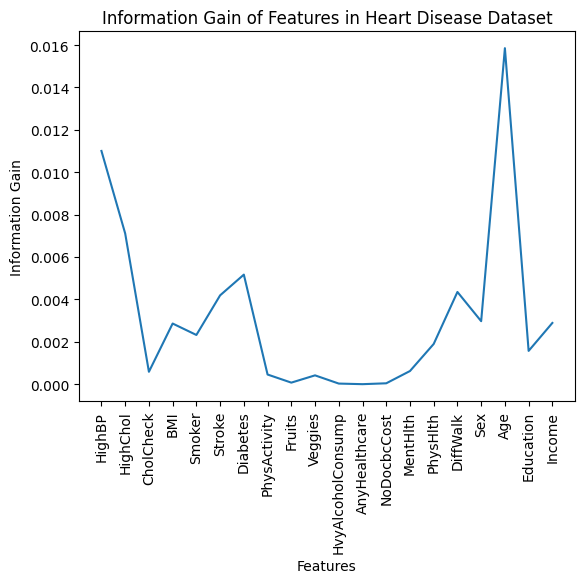

In [92]:
y = GenHlth_1['HeartDiseaseorAttack']
X = GenHlth_1[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_1 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_1.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_1)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()

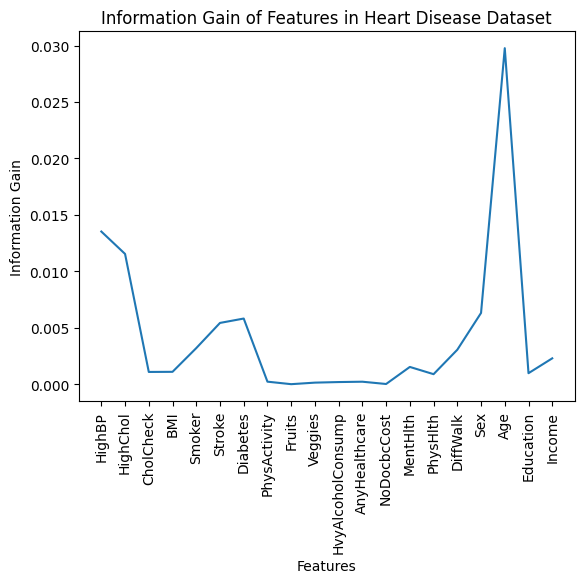

In [93]:
y = GenHlth_2['HeartDiseaseorAttack']
X = GenHlth_2[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_2 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_2.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_2)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()

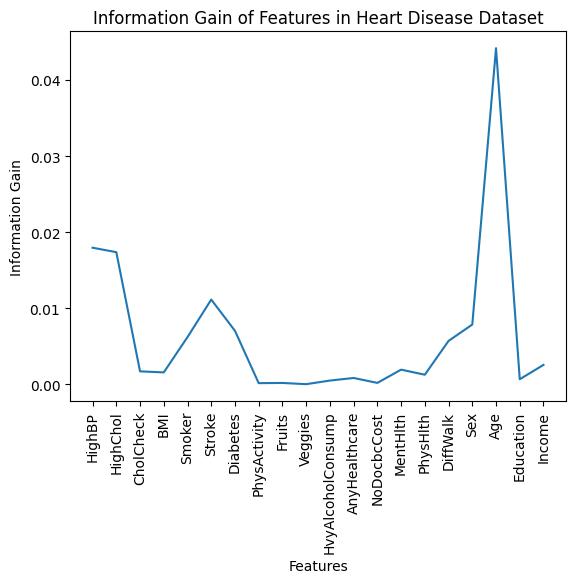

In [94]:
y = GenHlth_3['HeartDiseaseorAttack']
X = GenHlth_3[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_3 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_3.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_3)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()

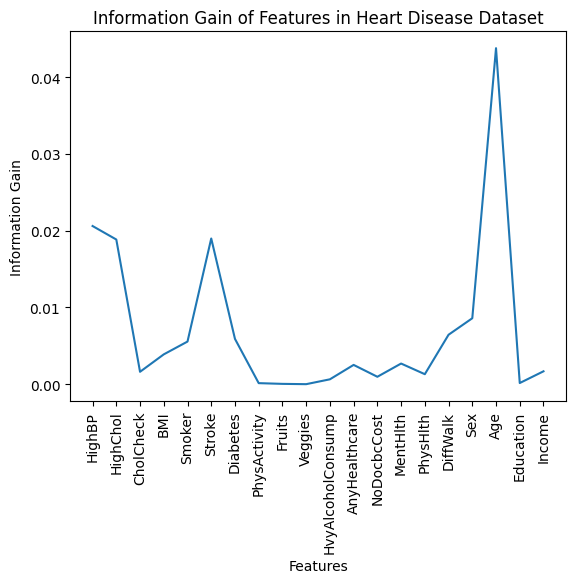

In [95]:
y = GenHlth_4['HeartDiseaseorAttack']
X = GenHlth_4[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_4 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_4.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_4)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()


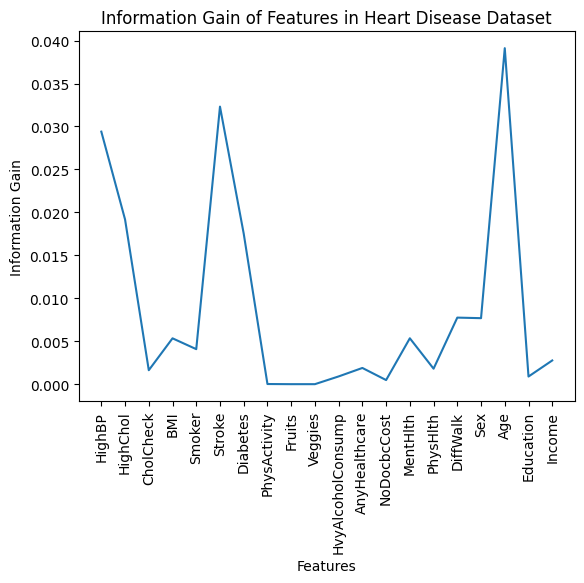

In [96]:
y = GenHlth_5['HeartDiseaseorAttack']
X = GenHlth_5[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_5 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_5.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_5)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()



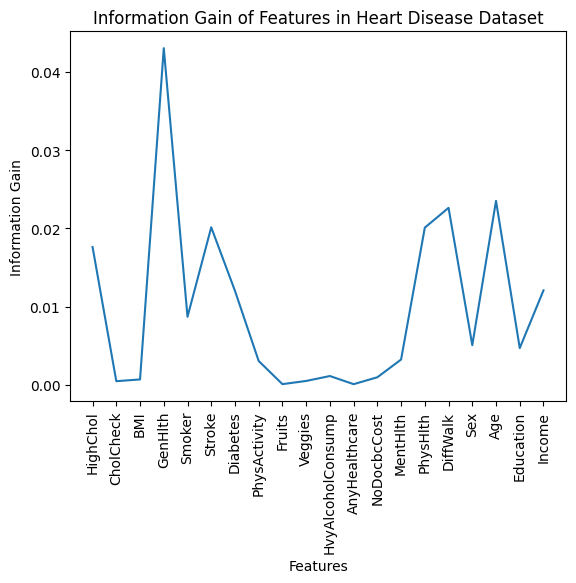

In [97]:
#high_bp_df
y = high_bp_df['HeartDiseaseorAttack']
X = high_bp_df[[  'HighChol', 'CholCheck', 'BMI','GenHlth',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_5 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_5.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_5)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()



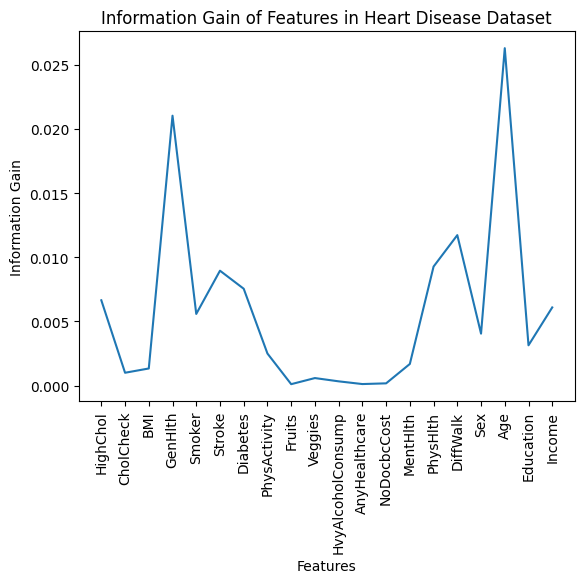

In [98]:
#normal_bp_df
y = normal_bp_df['HeartDiseaseorAttack']
X = normal_bp_df[[  'HighChol', 'CholCheck', 'BMI','GenHlth',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains_5 = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains_5.append(information_gain)

# Plot line chart of information gain for each feature
plt.plot(X.columns, information_gains_5)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=90)
plt.show()

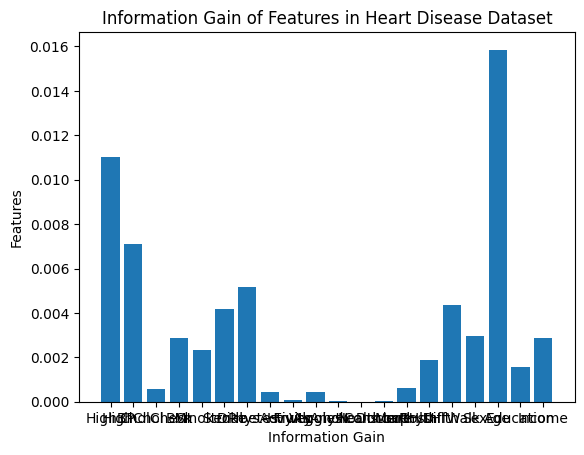

In [99]:
y = GenHlth_1['HeartDiseaseorAttack']
X = GenHlth_1[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

plt.bar(X.columns, information_gains)
plt.title("Information Gain of Features in Heart Disease Dataset")
plt.ylabel("Features")
plt.xlabel("Information Gain")
plt.show()



In [100]:
y = GenHlth_1['HeartDiseaseorAttack']
X = GenHlth_1[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]
def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

entropy_y = entropy(y)

# Calculate information gain of each feature
information_gains = []
for feature in X:
    # Calculate entropy of feature given target variable
    unique_values = X[feature].unique()
    entropy_feature_given_y = 0
    for value in unique_values:
        mask = X[feature] == value
        y_given_value = y[mask]
        entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)

    # Calculate information gain
    information_gain = entropy_y - entropy_feature_given_y
    information_gains.append(information_gain)

# Create DataFrame of feature names and information gains
df = pd.DataFrame(list(zip(X.columns, information_gains)), columns=['Feature', 'Information Gain'])


In [101]:
y1 = GenHlth_1['HD+Stroke']
X1 = GenHlth_1[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

y2 = GenHlth_2['HD+Stroke']
X2 = GenHlth_2[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

y3 = GenHlth_3['HD+Stroke']
X3 = GenHlth_3[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

y4 = GenHlth_4['HD+Stroke']
X4 = GenHlth_4[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

y5 = GenHlth_5['HD+Stroke']
X5 = GenHlth_5[[ 'HighBP', 'HighChol', 'CholCheck', 'BMI',
               'Smoker',  'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
               'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
               'Income']]

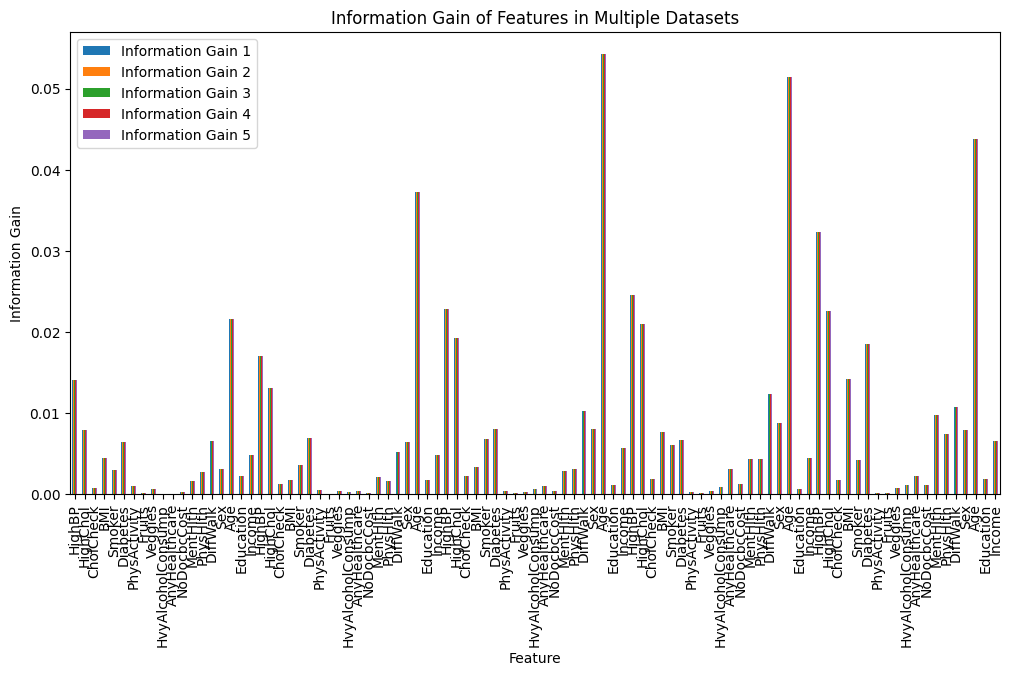

In [102]:
datasets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4), (X5, y5)]
dfs = []

def entropy(y):
    counts = y.value_counts()
    probabilities = counts / counts.sum()
    return -sum(probabilities * np.log2(probabilities))

for X, y in datasets:
    entropy_y = entropy(y)
    information_gains = []
    for feature in X:
        unique_values = X[feature].unique()
        entropy_feature_given_y = 0
        for value in unique_values:
            mask = X[feature] == value
            y_given_value = y[mask]
            entropy_feature_given_y += mask.sum() / len(X) * entropy(y_given_value)
        information_gain = entropy_y - entropy_feature_given_y
        information_gains.append(information_gain)
    df = pd.DataFrame({f"Information Gain {i}": information_gains for i in range(1, 6)})
    df.insert(0, "Feature", X.columns)
    dfs.append(df)

# Concatenate all dataframes into a single one
result_df = pd.concat(dfs, keys=range(len(dfs)))
result_df.index.names = ['Dataset', 'Index']
result_df.reset_index(inplace=True, drop=True)

# Plot the dataframe
result_df.plot(x="Feature", kind="bar", figsize=(12, 6))
plt.title("Information Gain of Features in Multiple Datasets")
plt.xlabel("Feature")
plt.ylabel("Information Gain")
plt.show()


In [103]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Select features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = 'HeartDiseaseorAttack'

X = heart_disease[features]
y = heart_disease[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9035004730368968


In [104]:

# Select features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = 'HeartDiseaseorAttack'

X = GenHlth_1[features]
y = GenHlth_1[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9775938189845474


In [105]:
# Select features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 
            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = 'HD+Stroke'

X = heart_disease[features]
y = heart_disease[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9033230842005676


In [106]:
# Select features and target
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 
            'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
            'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 
            'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = 'HD+Stroke'

X = GenHlth_1[features]
y = GenHlth_1[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9677704194260486


In [107]:
# Select features and target
features = ['HighBP', 'HighChol',   'GenHlth', 
            'DiffWalk', 'Sex' ]
target = 'HD+Stroke'

X = GenHlth_1[features]
y = GenHlth_1[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9704194260485651


In [108]:
# Create a dataframe for HighBP
Gh_high_bp_df = GenHlth_1[GenHlth_1['HighBP'] == 1]

# Create a dataframe for normal BP
Gh_normal_bp_df = GenHlth_1[GenHlth_1['HighBP'] == 0]

# Create a dataframe for HighChol
BP_high_chol_df = Gh_high_bp_df[Gh_high_bp_df['HighChol'] == 1]

# Create a dataframe for normal Chol
BP_normal_chol_df = Gh_high_bp_df[Gh_high_bp_df['HighChol'] == 0]

In [109]:
# Select features and target
features = ['HighBP', 'HighChol',   'GenHlth', 
            'DiffWalk', 'Sex' ]
target = 'HeartDiseaseorAttack'

X = GenHlth_1[features]
y = GenHlth_1[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9790286975717439


\begin{equation}
\hat{y} = \frac{1}{B} \sum_{i=1}^B f_i(x)
\end{equation}

where $\hat{y}$ is the predicted output, $B$ is the number of decision trees in the forest, and $f_i(x)$ is the prediction made by the $i$-th decision tree based on the input vector $x$. In addition, random forest uses bootstrap aggregating (bagging) and random feature selection to build multiple decision trees and reduce overfitting.

Each decision tree in the random forest is trained on a random subset of the training data, and a random subset of the features is selected for each split. This randomness helps to reduce the correlation between the trees and improve the generalization performance of the model.